***
#<font color="#274C77" size=10>Challenge TelecomX - PARTE 2</font>
***

## 🧠 Predicción de Cancelación de Clientes (Churn)

Este notebook forma parte del desafío **TelecomX Parte 2**, cuyo objetivo es construir un modelo de Machine Learning para predecir la cancelación de clientes de una empresa ficticia de telecomunicaciones.

**Enlace al Trello del proyecto**: [TelecomX_parte2_Latam](https://trello.com/b/J85wDAhj/telecomxparte2latam)  
**Repositorio GitHub**: [github.com/PamelaOrmeno/TelecomX_parte2_Latam](https://github.com/PamelaOrmeno/TelecomX_parte2_Latam)

---


## 📦 Importación de Librerías

Comenzamos cargando todas las librerías necesarias para manipulación de datos, visualización, preprocesamiento y modelado. Se incluye manejo de errores para asegurar que el entorno tenga todos los paquetes disponibles.

In [1]:
# Librerías principales
try:
    import pandas as pd
    from pandas import json_normalize
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px

    print("✅ Librerías de análisis y visualización cargadas correctamente.")
except ImportError as e:
    print(f"❌ Error al importar librerías principales: {e}")

# Librerías para machine learning
try:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix
    print("✅ Librerías de machine learning cargadas correctamente.")
except ImportError as e:
    print(f"❌ Error al importar librerías de machine learning: {e}")

# Configuraciones generales
try:
    import warnings
    warnings.filterwarnings('ignore')
    pd.set_option('display.max_columns', None)
    print("✅ Configuraciones aplicadas.")
except Exception as e:
    print(f"❌ Error en configuración inicial: {e}")


✅ Librerías de análisis y visualización cargadas correctamente.
✅ Librerías de machine learning cargadas correctamente.
✅ Configuraciones aplicadas.


## 🧱 Carga y Exploración Inicial

En esta etapa cargamos el dataset directamente desde un repositorio público de GitHub. Posteriormente, realizamos una exploración preliminar para entender su estructura general y detectar posibles problemas a resolver.


### 📦 Código Python: Carga desde GitHub

En esta sección se carga el dataset tratado desde GitHub mediante **pandas.read_csv()** sobre la URL **raw.githubusercontent.com**. Este enfoque mejora la portabilidad del notebook y facilita la trazabilidad del análisis.

El archivo corresponde al dataset transformado en la **Parte 1** del desafío TelecomX_LATAM, y servirá como base estructurada para el análisis exploratorio y la construcción de modelos.

In [2]:
# Cargar dataset desde GitHub (formato JSON plano)
try:
    import pandas as pd

    url_data = 'https://raw.githubusercontent.com/PamelaOrmeno/TelecomX_parte2_Latam/refs/heads/main/Data/TelecomX_Data_Transformada.csv'

    df = pd.read_csv(url_data)
    print(f"✅ Datos cargados desde GitHub. Registros encontrados: {len(df)}")

except Exception as e:
    print(f"❌ Error al cargar datos desde GitHub: {e}")


✅ Datos cargados desde GitHub. Registros encontrados: 7256


### 🔍 Código Python: Exploración Preliminar

Esta etapa inicial permite comprender la estructura del dataset mediante inspección de dimensiones, nombres de columnas y tipos de datos. Estos elementos son clave para identificar variables relevantes, detectar posibles inconsistencias y preparar el análisis exploratorio posterior.




In [3]:
# Exploración general de dimensiones, columnas y tipos de datos
try:
    print("📐 Dimensiones del dataset:", df.shape)

    print("\n🧩 Primeras columnas:")
    display(df.columns.to_frame(index=False).head())

    print("\n🧾 Tipos de datos:")
    display(df.dtypes)

except Exception as e:
    print(f"❌ Error durante la exploración inicial: {e}")


📐 Dimensiones del dataset: (7256, 22)

🧩 Primeras columnas:


,0
0,customerid
1,churn
2,gender
3,seniorcitizen
4,partner



🧾 Tipos de datos:


,0
customerid,object
churn,int64
gender,object
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,int64
internetservice,object


### 📊 Análisis Exploratorio de Datos (EDA)

En esta sección se aplican técnicas estadísticas y visuales para comprender la distribución, calidad y relaciones entre las variables del dataset. El objetivo es identificar patrones relevantes, posibles outliers, correlaciones significativas y variables que puedan influir en el abandono de clientes (Churn). Esta etapa es clave para tomar decisiones informadas antes del modelado.


🔎 Valores nulos por columna:



,nulos
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0



------------------------------------------------------------------------------------------------------------------------------------------------------



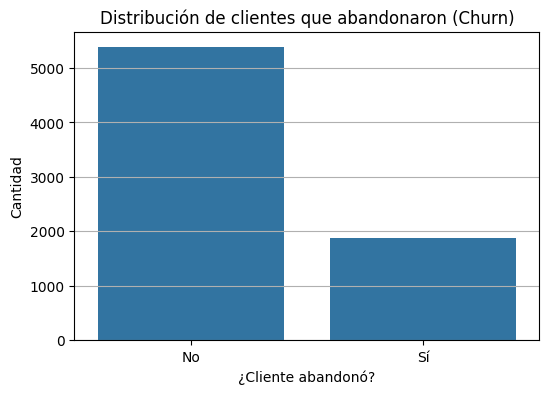


------------------------------------------------------------------------------------------------------------------------------------------------------



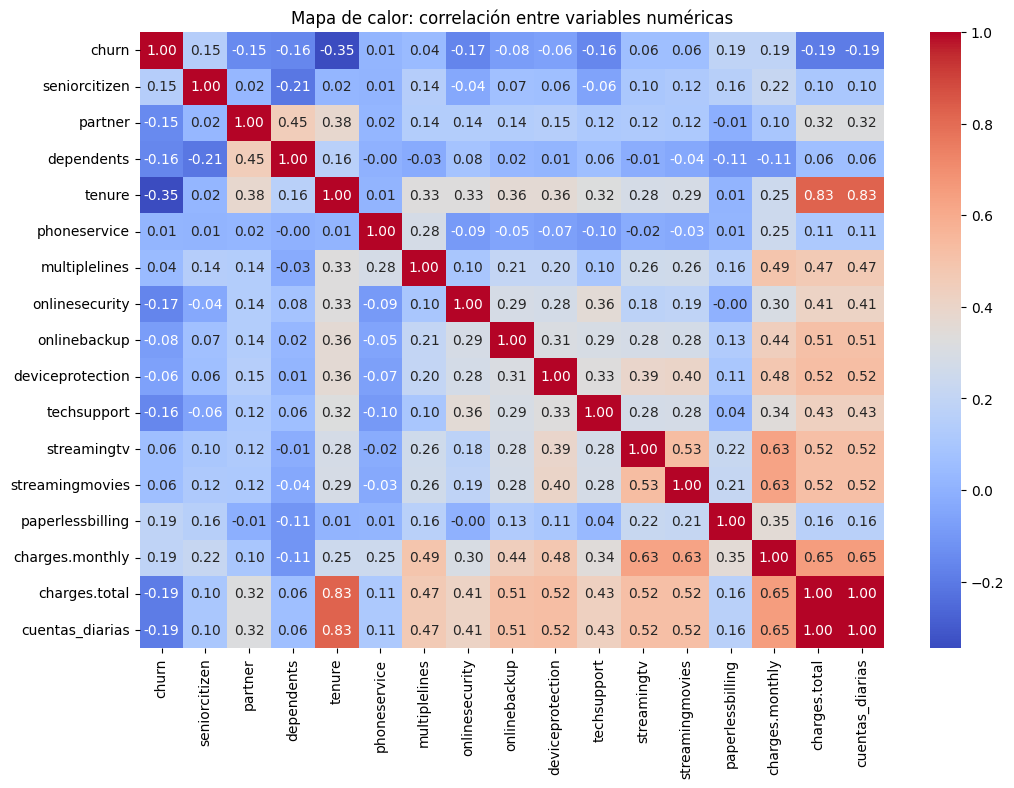


------------------------------------------------------------------------------------------------------------------------------------------------------



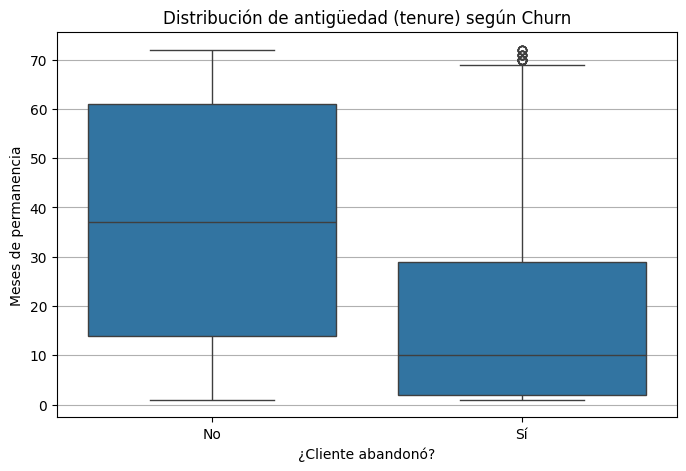


------------------------------------------------------------------------------------------------------------------------------------------------------



In [4]:
# 📊 Análisis Exploratorio de Datos (EDA)

try:
    # 1. Valores nulos
    print("🔎 Valores nulos por columna:\n")
    display(df.isnull().sum().to_frame("nulos").sort_values(by="nulos", ascending=False))
    print("\n" + "-"*150 + "\n")

    # 2. Distribución de la variable objetivo (churn)
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=df, x='churn')
    ax.set_xticklabels(["No", "Sí"])
    plt.title("Distribución de clientes que abandonaron (Churn)")
    plt.xlabel("¿Cliente abandonó?")
    plt.ylabel("Cantidad")
    plt.grid(axis='y')
    plt.show()
    print("\n" + "-"*150 + "\n")

    # 3. Correlación entre variables numéricas
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Mapa de calor: correlación entre variables numéricas")
    plt.show()
    print("\n" + "-"*150 + "\n")

    # 4. Boxplot de tenure por Churn (si existe la columna)
    if "tenure" in df.columns:
        plt.figure(figsize=(8,5))
        ax = sns.boxplot(data=df, x='churn', y='tenure')
        ax.set_xticklabels(["No", "Sí"])
        plt.title("Distribución de antigüedad (tenure) según Churn")
        plt.xlabel("¿Cliente abandonó?")
        plt.ylabel("Meses de permanencia")
        plt.grid(axis='y')
        plt.show()
        print("\n" + "-"*150 + "\n")

except Exception as e:
    print(f"❌ Error durante el análisis exploratorio: {e}")


### 🧮 Transformación de Variables Categóricas (Encoding)

En esta sección se identifican las variables categóricas presentes en el dataset y se transforman a formato numérico, requisito indispensable para la mayoría de los algoritmos de Machine Learning. Se aplica codificación tipo *Label Encoding* para variables binarias y *One-Hot Encoding* para variables con múltiples categorías, asegurando la integridad de la información sin introducir sesgos ordinales artificiales.


In [5]:
# 🧮 Transformación de Variables Categóricas (Encoding)

try:
    print("🔍 Columnas categóricas detectadas:\n")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print(cat_cols)

    print("\n🔄 Aplicando codificación...\n")

    # Eliminar espacios en columnas
    df.columns = df.columns.str.strip()

    # Label Encoding para columnas binarias (2 categorías)
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    for col in cat_cols:
        if df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])
            print(f"✅ Codificada columna binaria: {col}")

    print("\n" + "-"*150 + "\n")

    # One-Hot Encoding para columnas con más de 2 categorías
    cols_ohe = [col for col in cat_cols if df[col].nunique() > 2]
    df = pd.get_dummies(df, columns=cols_ohe, drop_first=True)
    print(f"✅ Columnas codificadas con One-Hot Encoding: {cols_ohe}")

    print("\n📐 Dimensiones finales del DataFrame:", df.shape)

except Exception as e:
    print(f"❌ Error durante el encoding de variables categóricas: {e}")


🔍 Columnas categóricas detectadas:

['customerid', 'gender', 'internetservice', 'contract', 'paymentmethod']

🔄 Aplicando codificación...

✅ Codificada columna binaria: gender

------------------------------------------------------------------------------------------------------------------------------------------------------

✅ Columnas codificadas con One-Hot Encoding: ['customerid', 'internetservice', 'contract', 'paymentmethod']

📐 Dimensiones finales del DataFrame: (7256, 7280)


In [9]:
# 🔍 Validación del encoding aplicado

try:
    print("📄 Vista previa del DataFrame post-encoding:\n")
    display(df.head())

    print("\n📊 Distribución de tipos de datos:\n")
    print(df.dtypes.value_counts())

    print("\n📋 Tipos por columna (primeras 20):")
    display(df.dtypes.to_frame("Tipo").head(20))

except Exception as e:
    print(f"❌ Error durante la validación del DataFrame codificado: {e}")


📄 Vista previa del DataFrame post-encoding:



,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges.monthly,charges.total,cuentas_diarias,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,customerid_0013-SMEOE,customerid_0014-BMAQU,customerid_0015-UOCOJ,customerid_0016-QLJIS,customerid_0017-DINOC,customerid_0017-IUDMW,customerid_0018-NYROU,customerid_0019-EFAEP,customerid_0019-GFNTW,customerid_0020-INWCK,customerid_0020-JDNXP,customerid_0021-IKXGC,customerid_0022-TCJCI,customerid_0023-HGHWL,customerid_0023-UYUPN,customerid_0023-XUOPT,customerid_0027-KWYKW,customerid_0030-FNXPP,customerid_0031-PVLZI,customerid_0032-PGELS,customerid_0036-IHMOT,customerid_0040-HALCW,customerid_0042-JVWOJ,customerid_0042-RLHYP,customerid_0047-ZHDTW,customerid_0048-LUMLS,customerid_0048-PIHNL,customerid_0052-DCKON,customerid_0052-YNYOT,customerid_0056-EPFBG,customerid_0057-QBUQH,customerid_0058-EVZWM,customerid_0060-FUALY,customerid_0064-SUDOG,customerid_0064-YIJGF,customerid_0067-DKWBL,customerid_0068-FIGTF,customerid_0071-NDAFP,customerid_0074-HDKDG,customerid_0076-LVEPS,customerid_0078-XZMHT,customerid_0080-EMYVY,customerid_0080-OROZO,customerid_0082-LDZUE,customerid_0082-OQIQY,customerid_0083-PIVIK,customerid_0089-IIQKO,customerid_0093-EXYQL,customerid_0093-XWZFY,customerid_0094-OIFMO,customerid_0096-BXERS,customerid_0096-FCPUF,customerid_0098-BOWSO,customerid_0100-DUVFC,customerid_0103-CSITQ,customerid_0104-PPXDV,customerid_0106-GHRQR,customerid_0106-UGRDO,customerid_0107-WESLM,customerid_0107-YHINA,customerid_0111-KLBQG,customerid_0112-QAWRZ,customerid_0112-QWPNC,customerid_0114-IGABW,customerid_0114-PEGZZ,customerid_0114-RSRRW,customerid_0115-TFERT,customerid_0117-LFRMW,customerid_0118-JPNOY,customerid_0120-YZLQA,customerid_0121-SNYRK,customerid_0122-OAHPZ,customerid_0123-CRBRT,customerid_0125-LZQXK,customerid_0128-MKWSG,customerid_0129-KPTWJ,customerid_0129-QMPDR,customerid_0130-SXOUN,customerid_0133-BMFZO,customerid_0134-XWXCE,customerid_0135-NMXAP,customerid_0136-IFMYD,customerid_0137-OCGAB,customerid_0137-UDEUO,customerid_0139-IVFJG,customerid_0141-YEAYS,customerid_0142-GVYSN,customerid_0147-ESWWR,customerid_0148-DCDOS,customerid_0151-ONTOV,customerid_0154-QYHJU,customerid_0156-FVPTA,customerid_0162-RZGMZ,customerid_0164-APGRB,customerid_0164-XAIRP,customerid_0168-XZKBB,customerid_0174-QRVVY,customerid_0177-PXBAT,customerid_0178-CIIKR,customerid_0178-SZBHO,customerid_0181-RITDD,customerid_0186-CAERR,customerid_0187-QSXOE,customerid_0187-WZNAB,customerid_0188-GWFLE,customerid_0191-EQUUH,customerid_0191-ZHSKZ,customerid_0193-ESZXP,customerid_0195-IESCP,customerid_0196-JTUQI,customerid_0196-VULGZ,customerid_0197-PNKNK,customerid_0201-MIBOL,customerid_0201-OAMXR,customerid_0203-HHYIJ,customerid_0206-OYVOC,customerid_0206-TBWLC,customerid_0207-MDKNV,customerid_0208-BPQEJ,customerid_0212-ISBBF,customerid_0214-JHPFW,customerid_0215-BQKGS,customerid_0218-QNVAS,customerid_0219-QAERP,customerid_0219-YTZUE,customerid_0220-EBGCE,customerid_0221-NAUXK,customerid_0221-WMXNQ,customerid_0222-CNVPT,customerid_0224-HJAPT,customerid_0224-NIJLP,customerid_0224-RLWWD,customerid_0225-ZORZP,customerid_0228-MAUWC,customerid_0229-LFJAF,customerid_0230-UBYPQ,customerid_0230-WEQUW,customerid_0231-LXVAP,customerid_0233-FTHAV,customerid_0234-TEVTT,customerid_0235-KGSLC,customerid_0236-HFWSV,customerid_0237-YFUTL,customerid_0238-WHBIQ,customerid_0239-OXEXL,customerid_0244-LGNFY,customerid_0247-SLUJI,customerid_0248-IPDFW,customerid_0248-PGHBZ,customerid_0253-ZTEOB,customerid_0254-FNMCI,customerid_0254-KCJGT,customerid_0254-WWRKD,customerid_0256-LTHVJ,customerid_0257-KXZGU,customerid_0257-ZESQC,customerid_0258-NOKBL,customerid_0259-GBZSH,customerid_0260-ZDLGK,customerid_0263-FJTQO,customerid_0264-CNITK,customerid_0265-EDXBD,customerid_0265-PSUAE,customerid_0266-CLZKZ,customerid_0266-GMEAO,customerid_0268-QKIWO,customeri


📊 Distribución de tipos de datos:

bool       7262
int64        15
float64       3
Name: count, dtype: int64

📋 Tipos por columna (primeras 20):


,Tipo
churn,int64
gender,int64
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,int64
onlinesecurity,int64
onlinebackup,int64


### 📎 Separación en Conjuntos de Entrenamiento y Prueba (train_test_split)

Con el dataset preprocesado y codificado, se realiza la separación en conjuntos de entrenamiento y prueba. Esta etapa es crucial para evaluar la capacidad del modelo de generalizar a nuevos datos. Se reserva un **20 %** del dataset para pruebas, manteniendo el **80 %** restante para entrenamiento. Esta separación garantiza una validación objetiva del rendimiento del modelo.


In [11]:
# 📎 División en conjuntos de entrenamiento y prueba

try:
    from sklearn.model_selection import train_test_split

    # Separar variables predictoras (X) y objetivo (y)
    X = df.drop('churn', axis=1)
    y = df['churn']

    # Separar datos con proporción 80/20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("✅ División realizada correctamente.\n")
    print(f"📊 Conjunto de entrenamiento: {X_train.shape[0]} registros")
    print(f"📊 Conjunto de prueba: {X_test.shape[0]} registros")

except Exception as e:
    print(f"❌ Error durante la separación de conjuntos: {e}")


✅ División realizada correctamente.

📊 Conjunto de entrenamiento: 5804 registros
📊 Conjunto de prueba: 1452 registros
